### IE6600 Computation and Visualization for Analytics
#### Spring 2025
#### **Project 2**
#### Group 2
##### Names:
- Stephy Romichan
- Gagan Yadav
- Meghana Rao

##### Submitted to: Prof Sivarit Sultornsanee
##### Submission Date: March 15, 2025

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Load the data
# In a real scenario, you would load the CSV file directly
# But here I'll create the DataFrame from the provided data
# First few rows of the data are shown for reference

# Create the DataFrame from CSV content


def clean_data(df):
    """Clean the DataFrame to prepare for analysis."""
    # Convert numeric columns to float, handling commas and empty strings
    numeric_cols = [
        'AENGLC Rank', 'Population of Service Area', 'Total Library Visits',
        'Library Visits Per Capita Served', 'Total Registered Borrowers',
        'Percent of Residents with Library Cards', 'Reference Questions',
        'Reference Questions Per Capita Served', 'Total Circulation',
        'Circulation Per Capita Served', 'Total Programs (Synchronous + Prerecorded)',
        'Total Program Attendance & Views', 'Total Program Attendance & Views Per Capita Served',
        'Use of Public Internet Computers', 'Total Collection',
        'Collection Per Capita Served', 'Total Operating Income',
        'Operating Income Per Capita', 'Town Tax Appropriation for Library',
        'Tax Appropriation Per Capita Served', 'Library Materials Expenditures',
        'Wages & Salaries Expenditures', 'Operating Expenditures',
        'Operating Expenditures Per Capita'
    ]
    
    for col in numeric_cols:
        if col in df.columns:
            df[col] = df[col].replace('', np.nan)
            df[col] = df[col].str.replace(',', '').astype(float) if df[col].dtype == 'object' else df[col]
    
    return df

# For demonstration, assume data is loaded
df = pd.read_csv('Public_Libraries.csv')
df = clean_data(df)

In [5]:
# Basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nData Types:")
print(df.dtypes)

print("\nSummary Statistics:")
print(df.describe())

print("\nMissing Values by Column:")
print(df.isnull().sum())



Dataset Shape: (5105, 29)

Data Types:
Fiscal Year                                             int64
Library                                                object
County                                                 object
Principal Public?                                      object
AENGLC Rank                                           float64
Population of Service Area                            float64
Total Library Visits                                  float64
Library Visits Per Capita Served                      float64
Total Registered Borrowers                            float64
Percent of Residents with Library Cards               float64
Registrations Per Capita Served                       float64
Reference Questions                                   float64
Reference Questions Per Capita Served                 float64
Total Circulation                                     float64
Circulation Per Capita Served                         float64
Total Programs (Synchronous + P

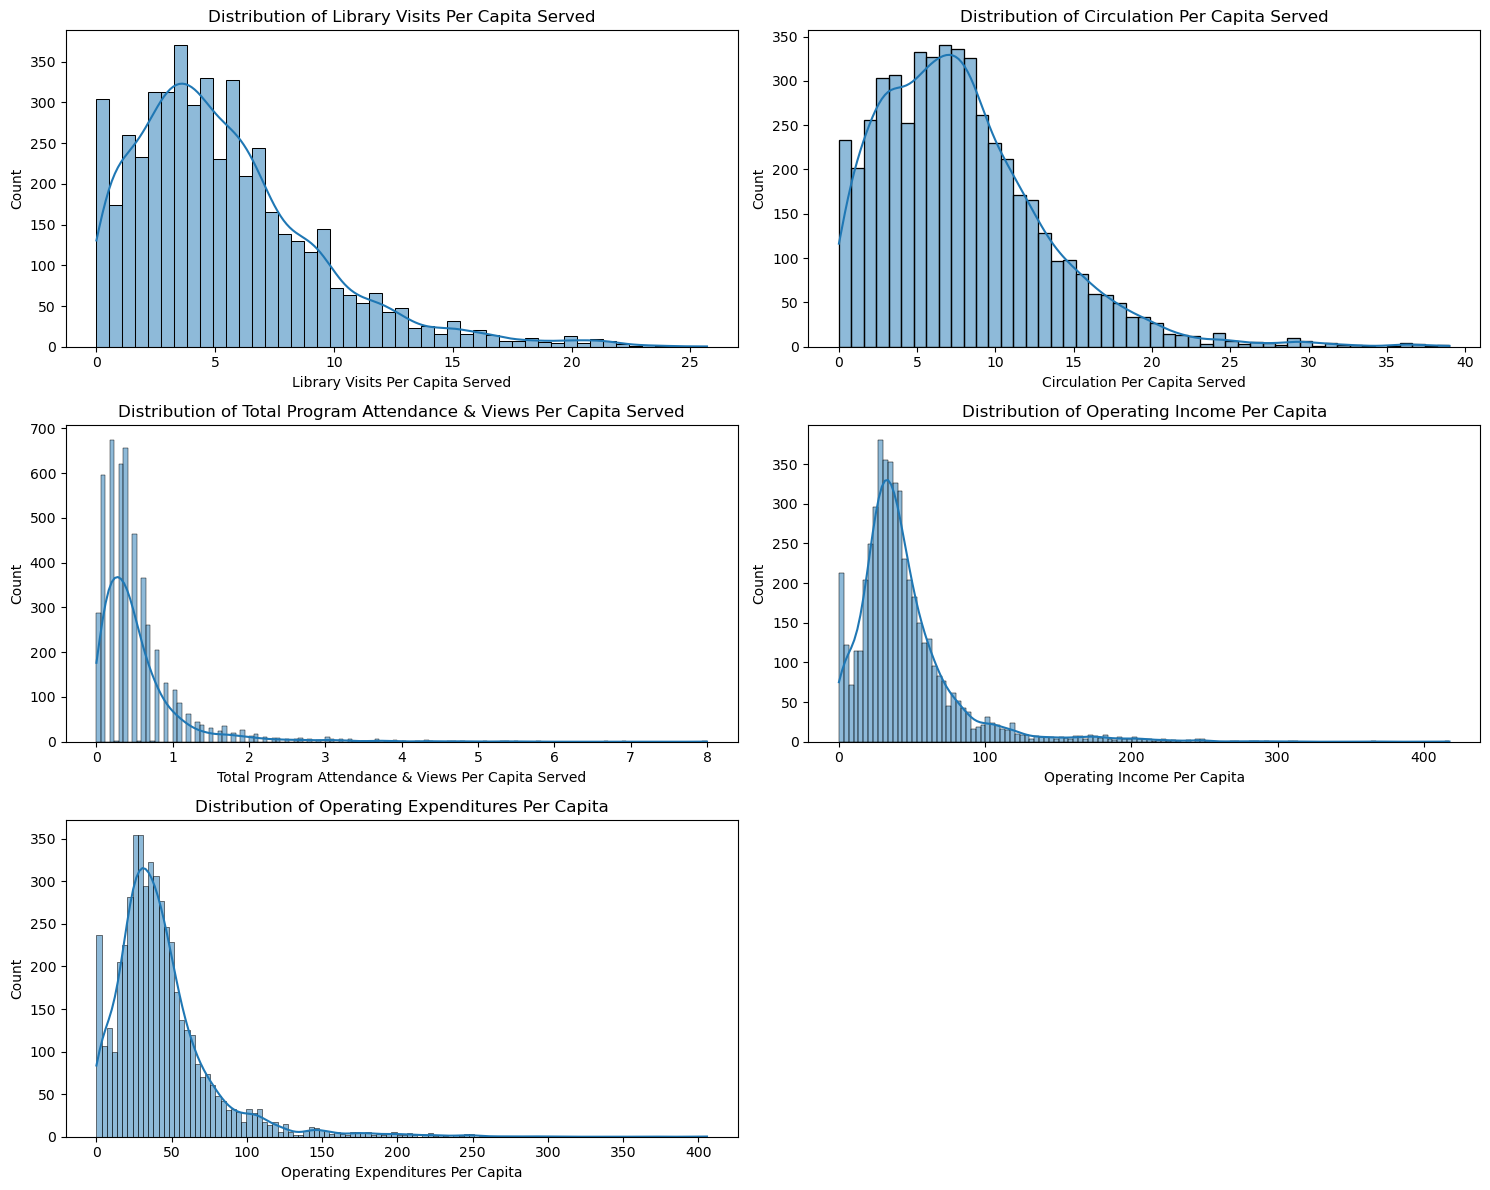

In [7]:
# Exploratory Analysis

df.drop(columns=['Registrations Per Capita Served'], inplace=True)

# 1. Distribution of key metrics
metrics_to_plot = [
    'Library Visits Per Capita Served', 
    'Circulation Per Capita Served',
    'Total Program Attendance & Views Per Capita Served',
    'Operating Income Per Capita',
    'Operating Expenditures Per Capita'
]

plt.figure(figsize=(15, 12))
for i, metric in enumerate(metrics_to_plot, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[metric].dropna(), kde=True)
    plt.title(f'Distribution of {metric}')
    plt.tight_layout()
plt.savefig('key_metrics_distribution.png')
plt.show()
plt.close()



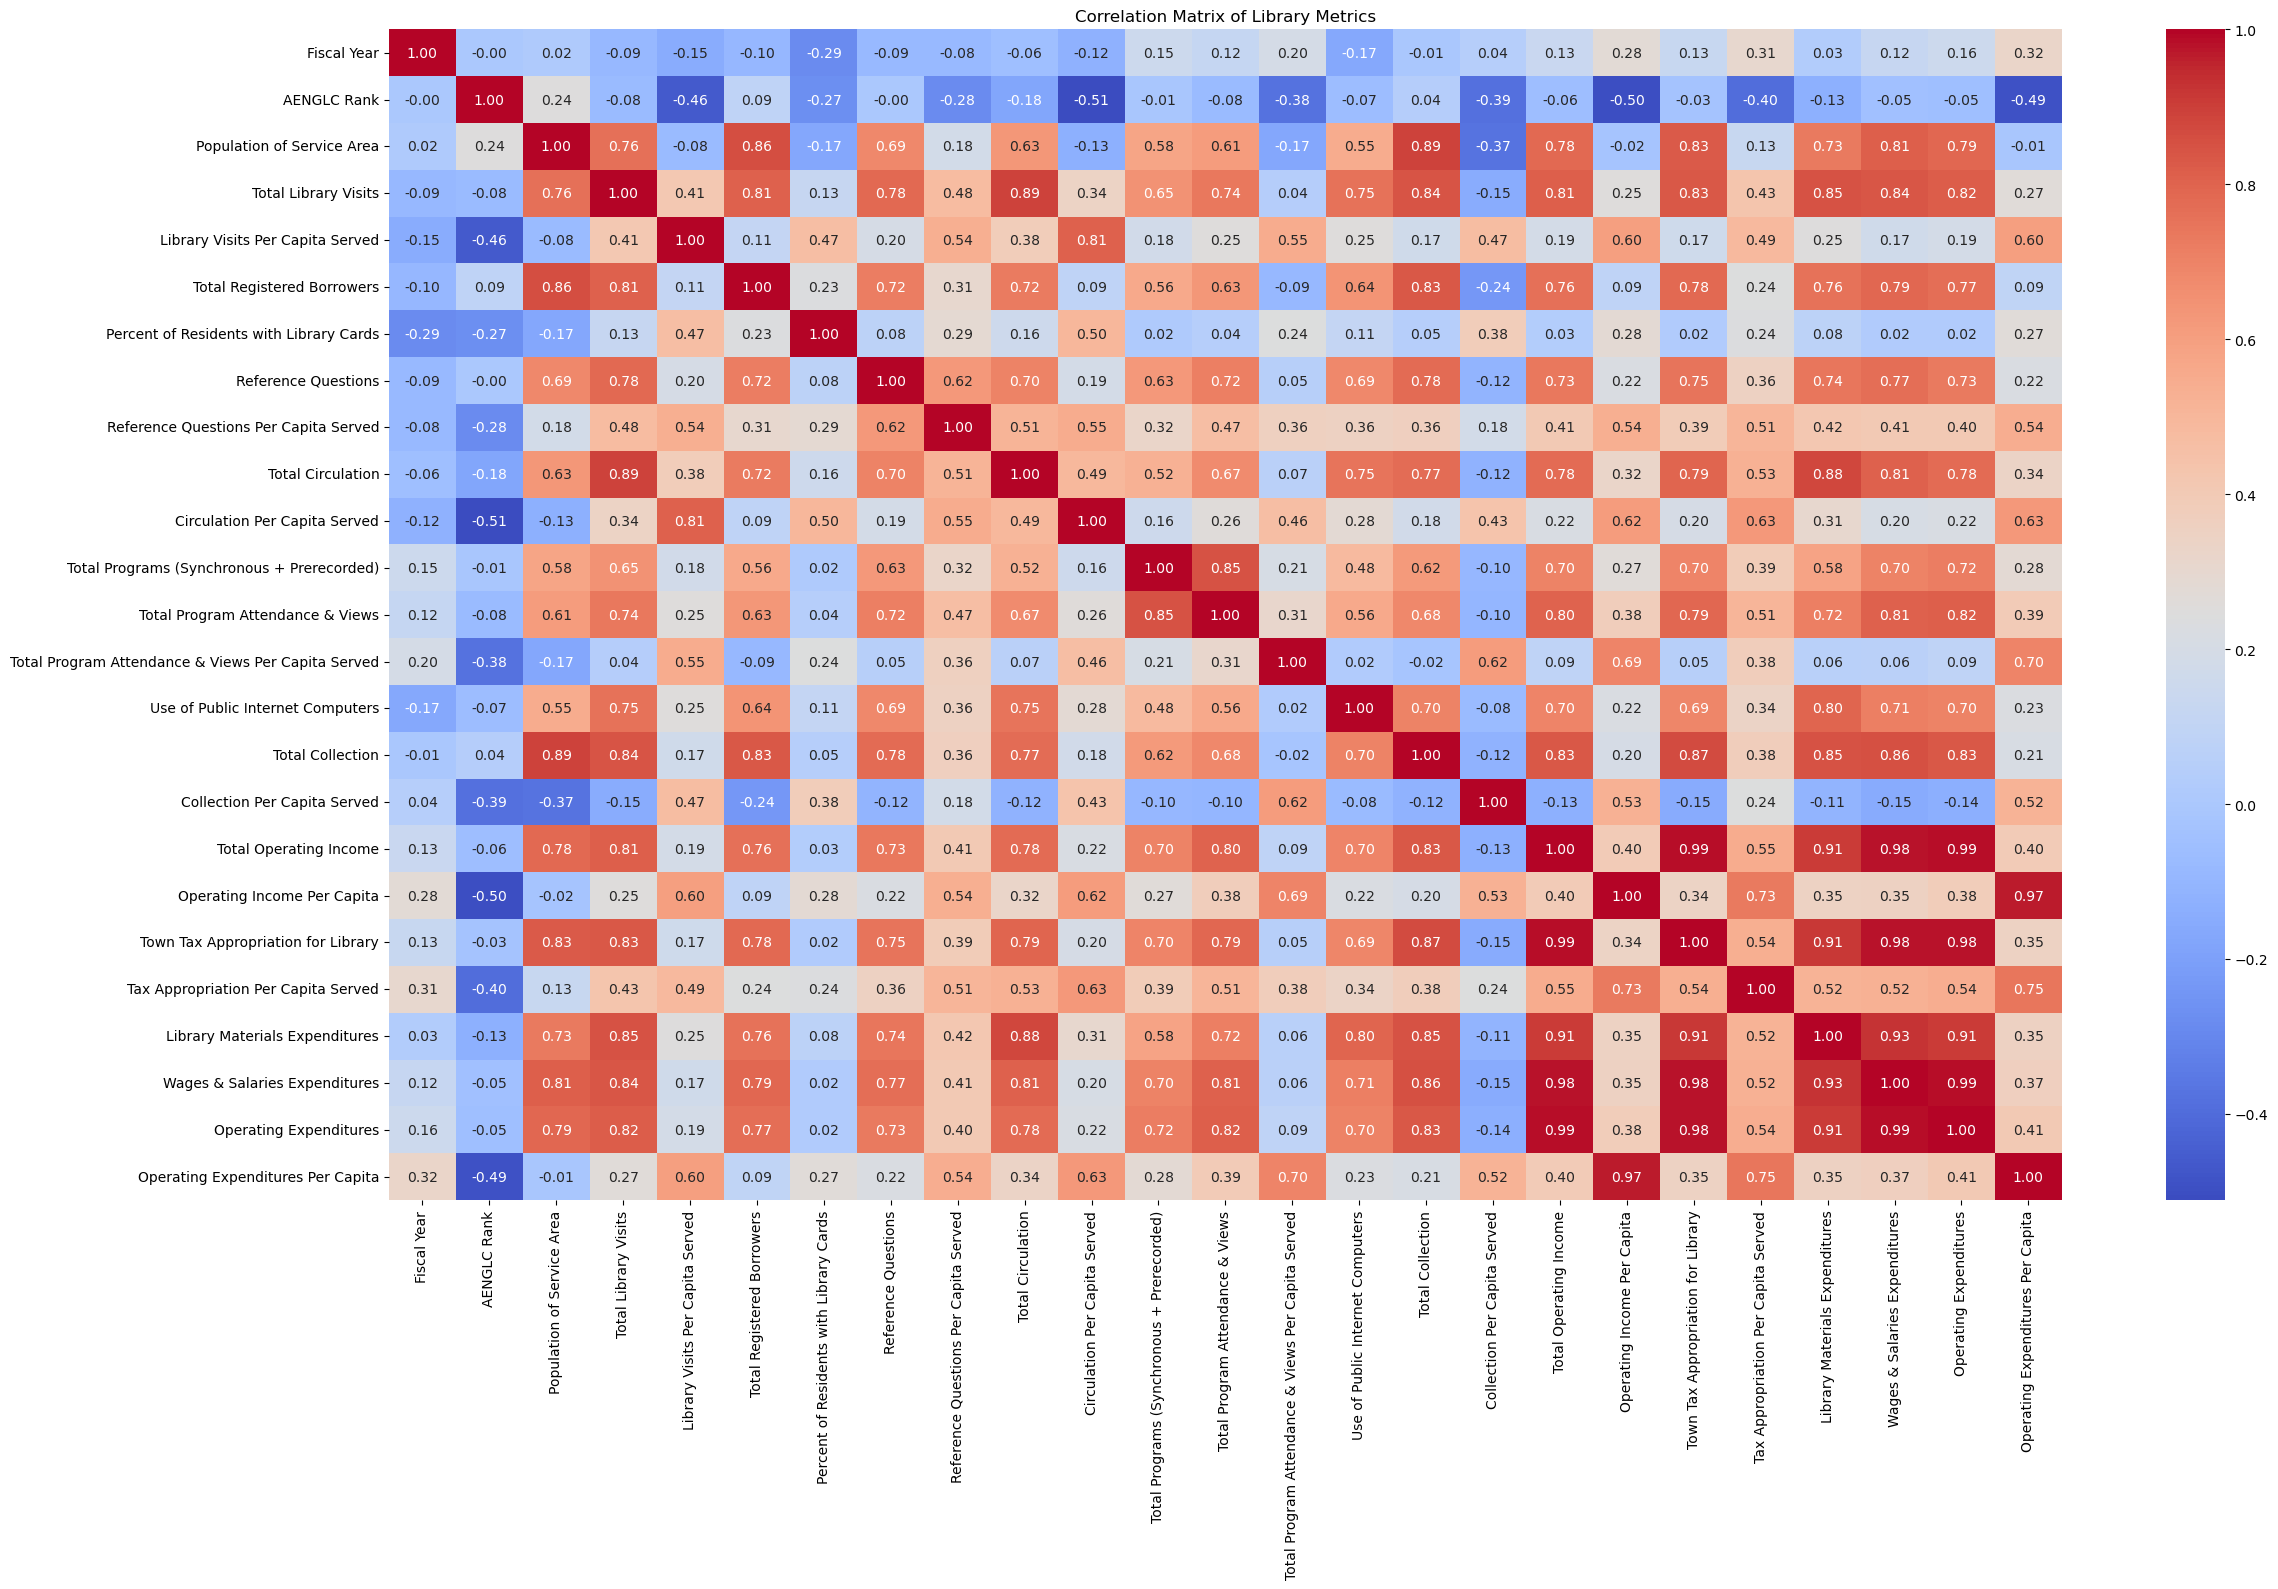

In [9]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix_df = numeric_df.corr()
plt.figure(figsize=(25, 16))
sns.heatmap(corr_matrix_df, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Library Metrics')
plt.tight_layout()
plt.savefig('correlation_matrix_full.png')
plt.show()
plt.close()

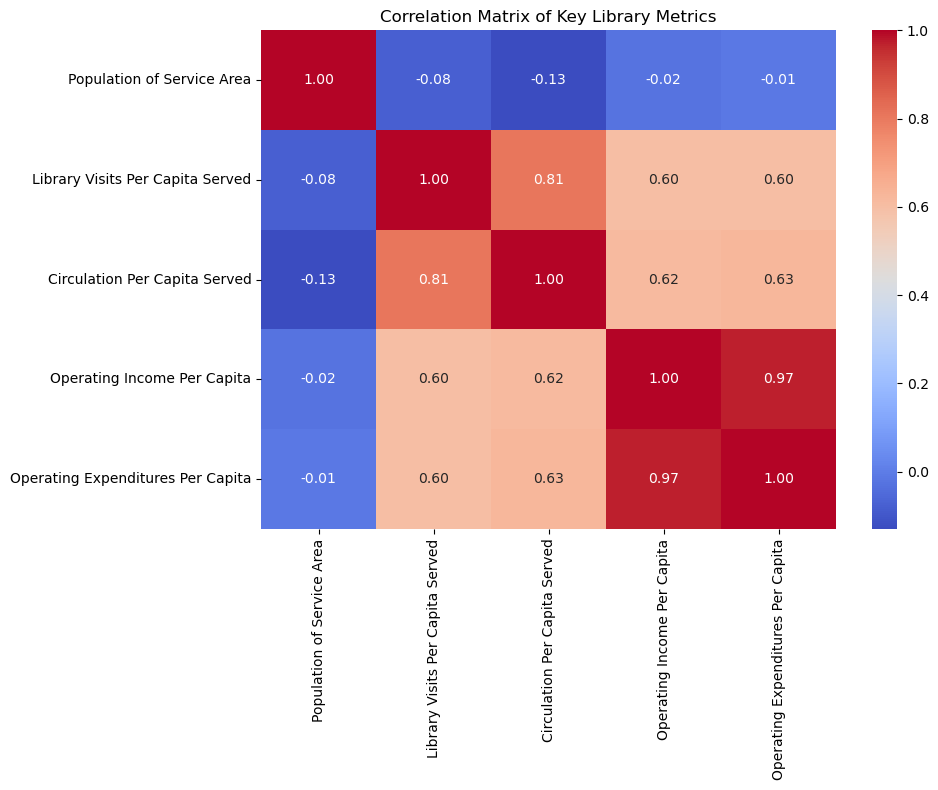

In [10]:
# 2. Correlation between metrics
correlation_metrics = [
    'Population of Service Area',
    'Library Visits Per Capita Served',
    'Circulation Per Capita Served',
    'Operating Income Per Capita',
    'Operating Expenditures Per Capita'
]

corr_matrix = df[correlation_metrics].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Key Library Metrics')
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.show()
plt.close()



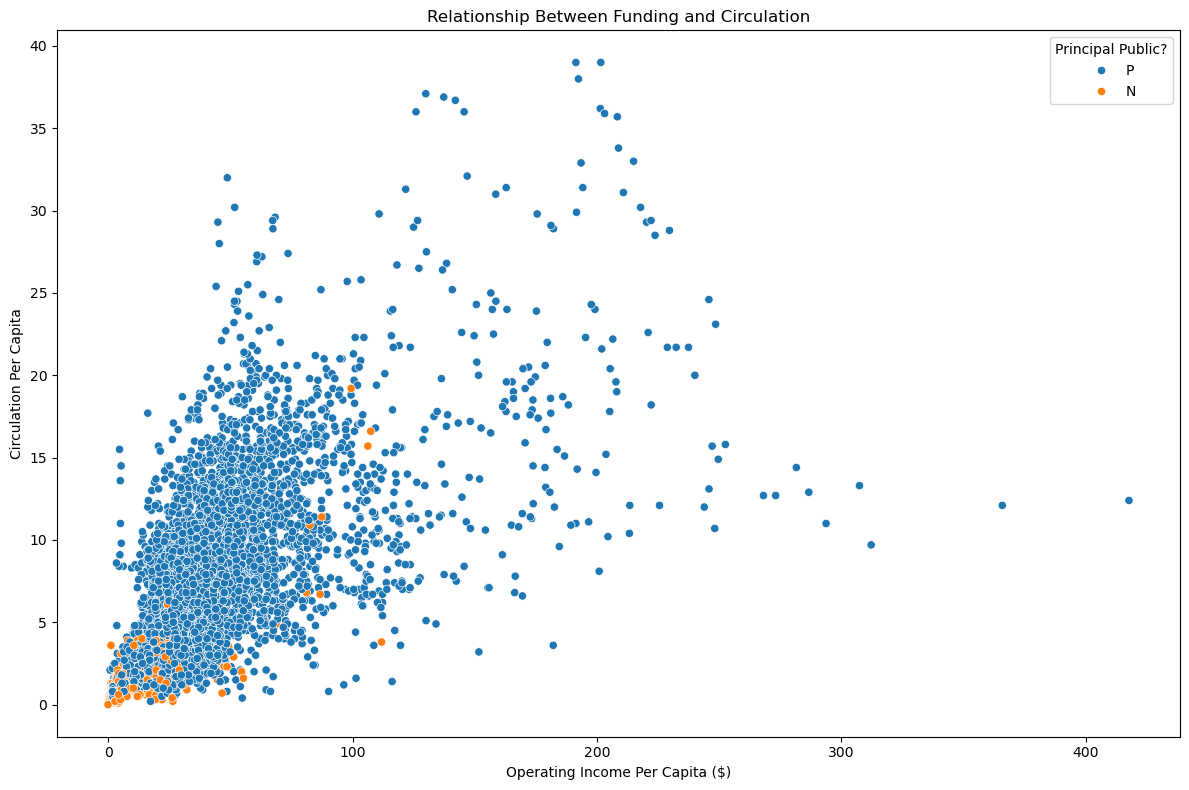

In [14]:
# 3. Relationship between funding and services
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Operating Income Per Capita', 
    y='Circulation Per Capita Served', 
    hue='Principal Public?',
    data=df
)
plt.title('Relationship Between Funding and Circulation')
plt.xlabel('Operating Income Per Capita ($)')
plt.ylabel('Circulation Per Capita')
plt.tight_layout()
plt.savefig('funding_vs_circulation.png')
plt.show()
plt.close()



<Figure size 1400x1000 with 0 Axes>

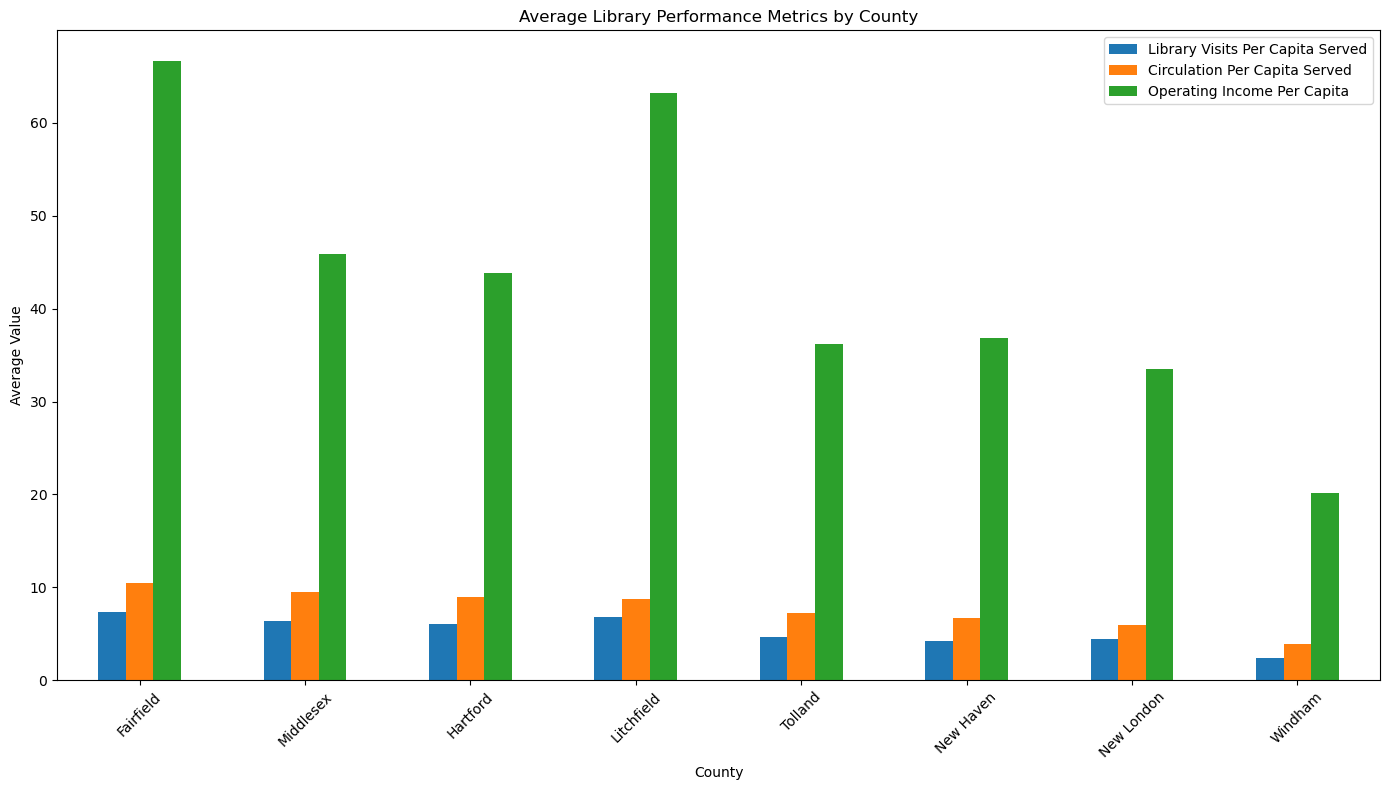

In [16]:
# 4. Library performance by county
plt.figure(figsize=(14, 10))
county_metrics = df.groupby('County')[
    ['Library Visits Per Capita Served', 'Circulation Per Capita Served', 'Operating Income Per Capita']
].mean().sort_values('Circulation Per Capita Served', ascending=False)

county_metrics.plot(kind='bar', figsize=(14, 8))
plt.title('Average Library Performance Metrics by County')
plt.ylabel('Average Value')
plt.xlabel('County')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('county_performance.png')
plt.show()
plt.close()

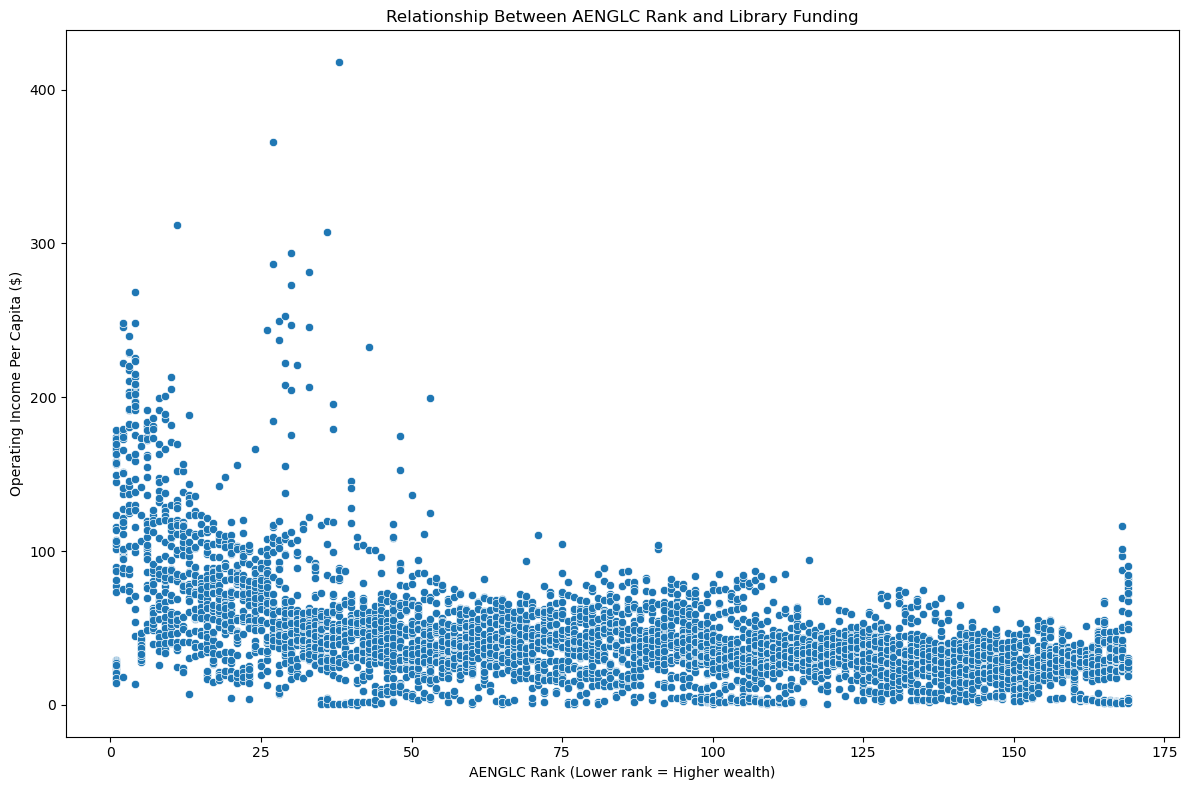

In [18]:
# 5. Effect of AENGLC Rank on library funding
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='AENGLC Rank', 
    y='Operating Income Per Capita',
    data=df.sort_values('AENGLC Rank')
)
plt.title('Relationship Between AENGLC Rank and Library Funding')
plt.xlabel('AENGLC Rank (Lower rank = Higher wealth)')
plt.ylabel('Operating Income Per Capita ($)')
plt.tight_layout()
plt.savefig('rank_vs_funding.png')
plt.show()
plt.close()


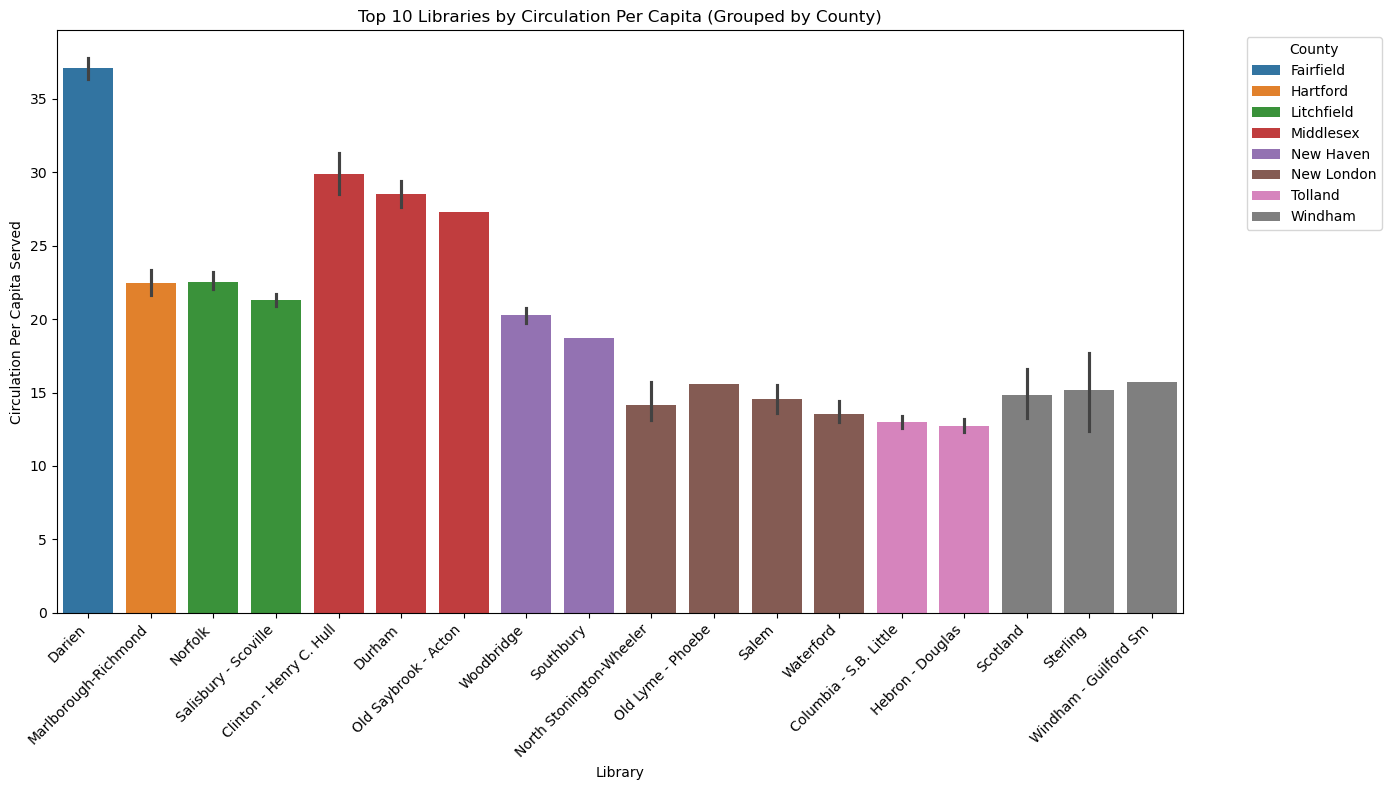

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# 6. Group by County and get the top 10 libraries in each county by circulation per capita
top_circulation_by_county = df.sort_values(['County', 'Circulation Per Capita Served'], ascending=[True, False])
top_circulation_by_county = top_circulation_by_county.groupby('County').head(10)

plt.figure(figsize=(14, 8))
sns.barplot(
    x='Library', 
    y='Circulation Per Capita Served',
    hue='County',
    data=top_circulation_by_county
)
plt.title('Top 10 Libraries by Circulation Per Capita (Grouped by County)')
plt.xticks(rotation=45, ha='right')
plt.legend(title="County", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('top_circulation_by_county.png')
plt.show()
plt.close()


<Figure size 1200x800 with 0 Axes>

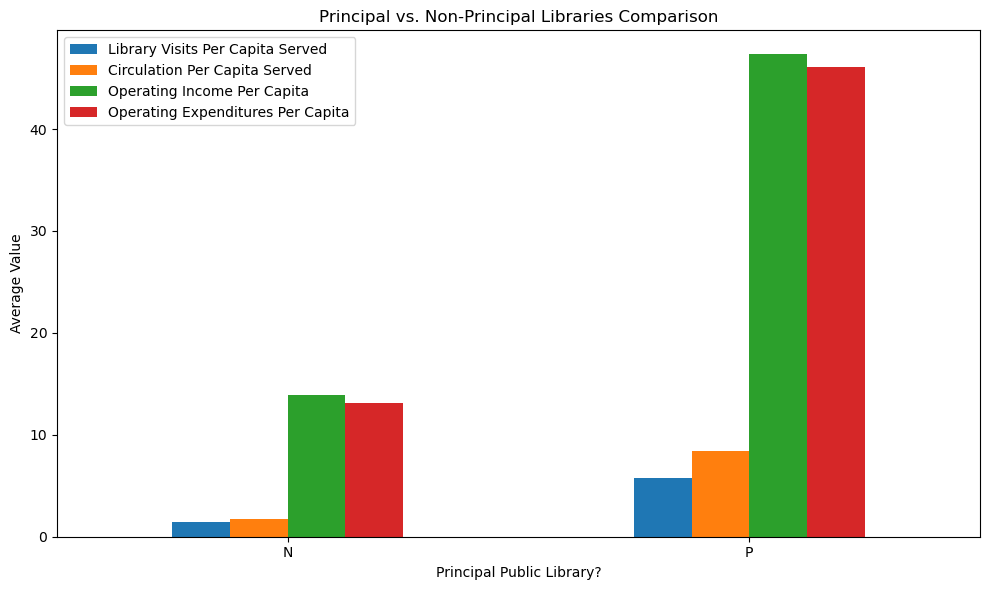

In [22]:
# 7. Principal vs. Non-Principal Libraries Comparison
principal_comparison = df.groupby('Principal Public?')[
    ['Library Visits Per Capita Served', 'Circulation Per Capita Served',
     'Operating Income Per Capita', 'Operating Expenditures Per Capita']
].mean()

plt.figure(figsize=(12, 8))
principal_comparison.plot(kind='bar', figsize=(10, 6))
plt.title('Principal vs. Non-Principal Libraries Comparison')
plt.xlabel('Principal Public Library?')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('principal_vs_non_principal.png')
plt.show()
plt.close()

In [24]:
# 8. Create a function to find correlates of community engagement
def analyze_engagement_factors(df, engagement_metric):
    potential_factors = [
        'AENGLC Rank', 'Population of Service Area', 
        'Total Collection', 'Collection Per Capita Served',
        'Operating Income Per Capita', 'Library Materials Expenditures',
        'Operating Expenditures Per Capita'
    ]
    
    results = []
    for factor in potential_factors:
        # Filter out missing values for both columns
        valid_data = df[[factor, engagement_metric]].dropna()
        
        if len(valid_data) > 5:  # Only calculate if we have enough data
            correlation, p_value = pearsonr(valid_data[factor], valid_data[engagement_metric])
            results.append({
                'Factor': factor,
                'Correlation': correlation,
                'P-Value': p_value
            })
    
    return pd.DataFrame(results).sort_values('Correlation', ascending=False)

# Analyze factors correlated with circulation
circulation_factors = analyze_engagement_factors(df, 'Circulation Per Capita Served')
print("\nFactors Correlated with Circulation Per Capita:")
plt.show()
print(circulation_factors)


Factors Correlated with Circulation Per Capita:
                              Factor  Correlation        P-Value
6  Operating Expenditures Per Capita     0.626318   0.000000e+00
4        Operating Income Per Capita     0.616048   0.000000e+00
3       Collection Per Capita Served     0.434126  8.054687e-227
5     Library Materials Expenditures     0.307358  6.979781e-110
2                   Total Collection     0.176119   3.799268e-36
1         Population of Service Area    -0.129359   9.677374e-19
0                        AENGLC Rank    -0.511215   0.000000e+00


In [26]:
# Analyze factors correlated with library visits
visits_factors = analyze_engagement_factors(df, 'Library Visits Per Capita Served')
print("\nFactors Correlated with Library Visits Per Capita:")
print(visits_factors)


Factors Correlated with Library Visits Per Capita:
                              Factor  Correlation        P-Value
6  Operating Expenditures Per Capita     0.601810   0.000000e+00
4        Operating Income Per Capita     0.601468   0.000000e+00
3       Collection Per Capita Served     0.472888  1.135662e-265
5     Library Materials Expenditures     0.249760   1.120805e-69
2                   Total Collection     0.172413   1.310669e-33
1         Population of Service Area    -0.078989   1.171494e-07
0                        AENGLC Rank    -0.461946  6.251095e-253


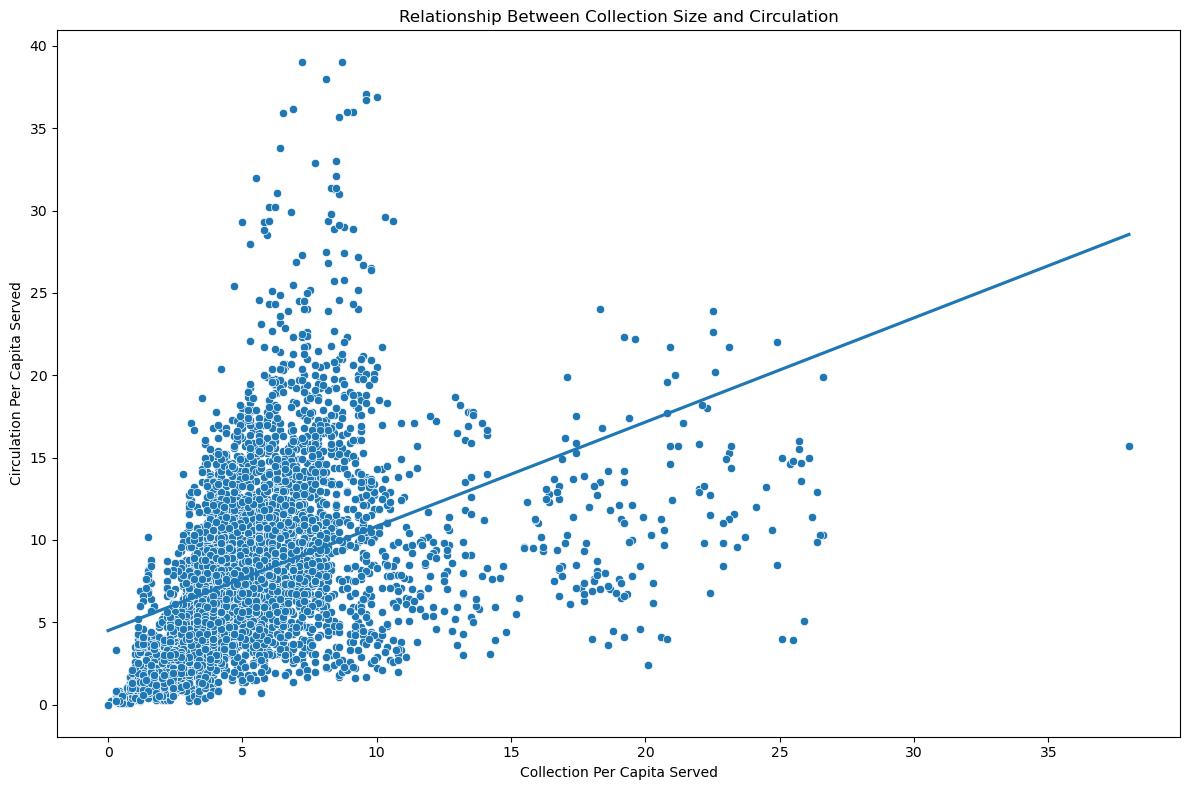

In [28]:
# 9. Examine the relationship between collection size and usage
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Collection Per Capita Served', 
    y='Circulation Per Capita Served',
    data=df
)
plt.title('Relationship Between Collection Size and Circulation')
plt.xlabel('Collection Items Per Capita')
plt.ylabel('Circulation Per Capita')
# Add a trend line
sns.regplot(
    x='Collection Per Capita Served', 
    y='Circulation Per Capita Served',
    data=df,
    scatter=False, 
    ci=None
)
plt.tight_layout()
plt.savefig('collection_vs_circulation.png')
plt.show()
plt.close()

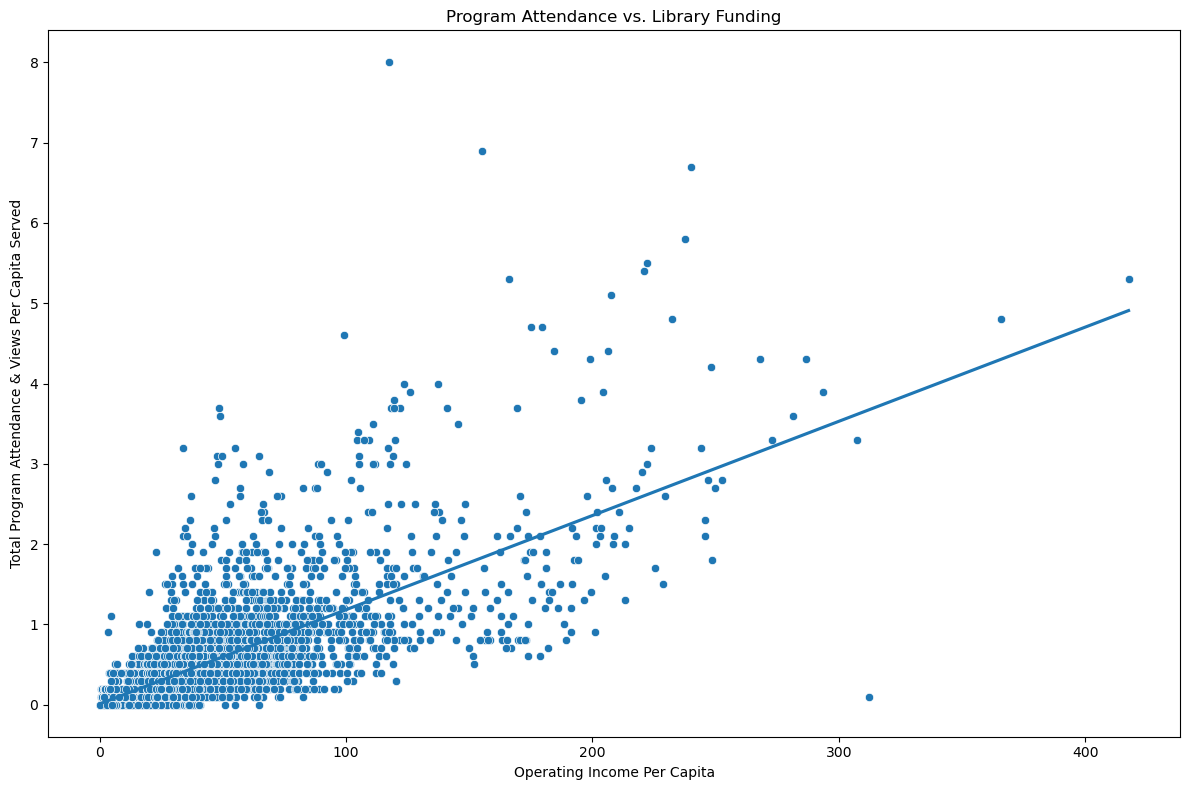

In [30]:
# 10. Analyze how program attendance varies with library funding
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Operating Income Per Capita', 
    y='Total Program Attendance & Views Per Capita Served',
    data=df
)
plt.title('Program Attendance vs. Library Funding')
plt.xlabel('Operating Income Per Capita ($)')
plt.ylabel('Program Attendance Per Capita')
# Add a trend line
sns.regplot(
    x='Operating Income Per Capita', 
    y='Total Program Attendance & Views Per Capita Served',
    data=df,
    scatter=False, 
    ci=None
)
plt.tight_layout()
plt.savefig('funding_vs_attendance.png')
plt.show()
plt.close()


In [32]:
# Create a summary of findings
print("\n=== Summary of Key Findings ===")
print(f"1. Average circulation per capita: {df['Circulation Per Capita Served'].mean():.2f}")
print(f"2. Average library visits per capita: {df['Library Visits Per Capita Served'].mean():.2f}")
print(f"3. Average operating income per capita: ${df['Operating Income Per Capita'].mean():.2f}")
print(f"4. Average operating expenditures per capita: ${df['Operating Expenditures Per Capita'].mean():.2f}")

print("\n5. Top 3 counties by average circulation per capita:")
top_counties = county_metrics['Circulation Per Capita Served'].nlargest(3)
for county, value in top_counties.items():
    print(f"   - {county}: {value:.2f}")

print("\n6. Correlation between operating income and circulation per capita:")
income_circ_corr = df[['Operating Income Per Capita', 'Circulation Per Capita Served']].corr().iloc[0,1]
print(f"   {income_circ_corr:.3f}")


=== Summary of Key Findings ===
1. Average circulation per capita: 7.84
2. Average library visits per capita: 5.41
3. Average operating income per capita: $44.69
4. Average operating expenditures per capita: $43.50

5. Top 3 counties by average circulation per capita:
   - Fairfield: 10.49
   - Middlesex: 9.54
   - Hartford: 8.99

6. Correlation between operating income and circulation per capita:
   0.616


In [34]:
# Additional analysis for libraries serving different population sizes
df['Population Size Category'] = pd.cut(
    df['Population of Service Area'],
    bins=[0, 5000, 20000, 50000, float('inf')],
    labels=['Small (<5K)', 'Medium (5K-20K)', 'Large (20K-50K)', 'Very Large (>50K)']
)

population_metrics = df.groupby('Population Size Category')[
    ['Library Visits Per Capita Served', 'Circulation Per Capita Served', 
     'Operating Income Per Capita', 'Operating Expenditures Per Capita']
].mean()

print("\n7. Library performance by population size:")
print(population_metrics)


7. Library performance by population size:
                          Library Visits Per Capita Served  \
Population Size Category                                     
Small (<5K)                                       5.612321   
Medium (5K-20K)                                   5.785399   
Large (20K-50K)                                   6.262013   
Very Large (>50K)                                 4.864742   

                          Circulation Per Capita Served  \
Population Size Category                                  
Small (<5K)                                    7.640029   
Medium (5K-20K)                                8.706278   
Large (20K-50K)                                9.165653   
Very Large (>50K)                              6.799399   

                          Operating Income Per Capita  \
Population Size Category                                
Small (<5K)                                 52.853201   
Medium (5K-20K)                             42.766568   


C:\Users\megha\AppData\Local\Temp\ipykernel_33420\1886220024.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  population_metrics = df.groupby('Population Size Category')[


In [36]:
# Calculate efficiency metric (circulation per dollar spent)
df['Circulation per Dollar'] = df['Circulation Per Capita Served'] / df['Operating Expenditures Per Capita']

top_efficient = df.sort_values('Circulation per Dollar', ascending=False).head(5)
print("\n8. Top 5 most efficient libraries (circulation per dollar spent):")
for i, (idx, row) in enumerate(top_efficient.iterrows(), 1):
    print(f"   {i}. {row['Library']}: {row['Circulation per Dollar']:.3f} items per dollar")

# Export clean data with derived metrics for further analysis
df.to_csv('cleaned_library_data.csv', index=False)


8. Top 5 most efficient libraries (circulation per dollar spent):
   1. New Hartford-Bakerville: 2.571 items per dollar
   2. Salem: 2.049 items per dollar
   3. Salem: 1.885 items per dollar
   4. Salem: 1.655 items per dollar
   5. Woodstock - Bracken: 1.571 items per dollar


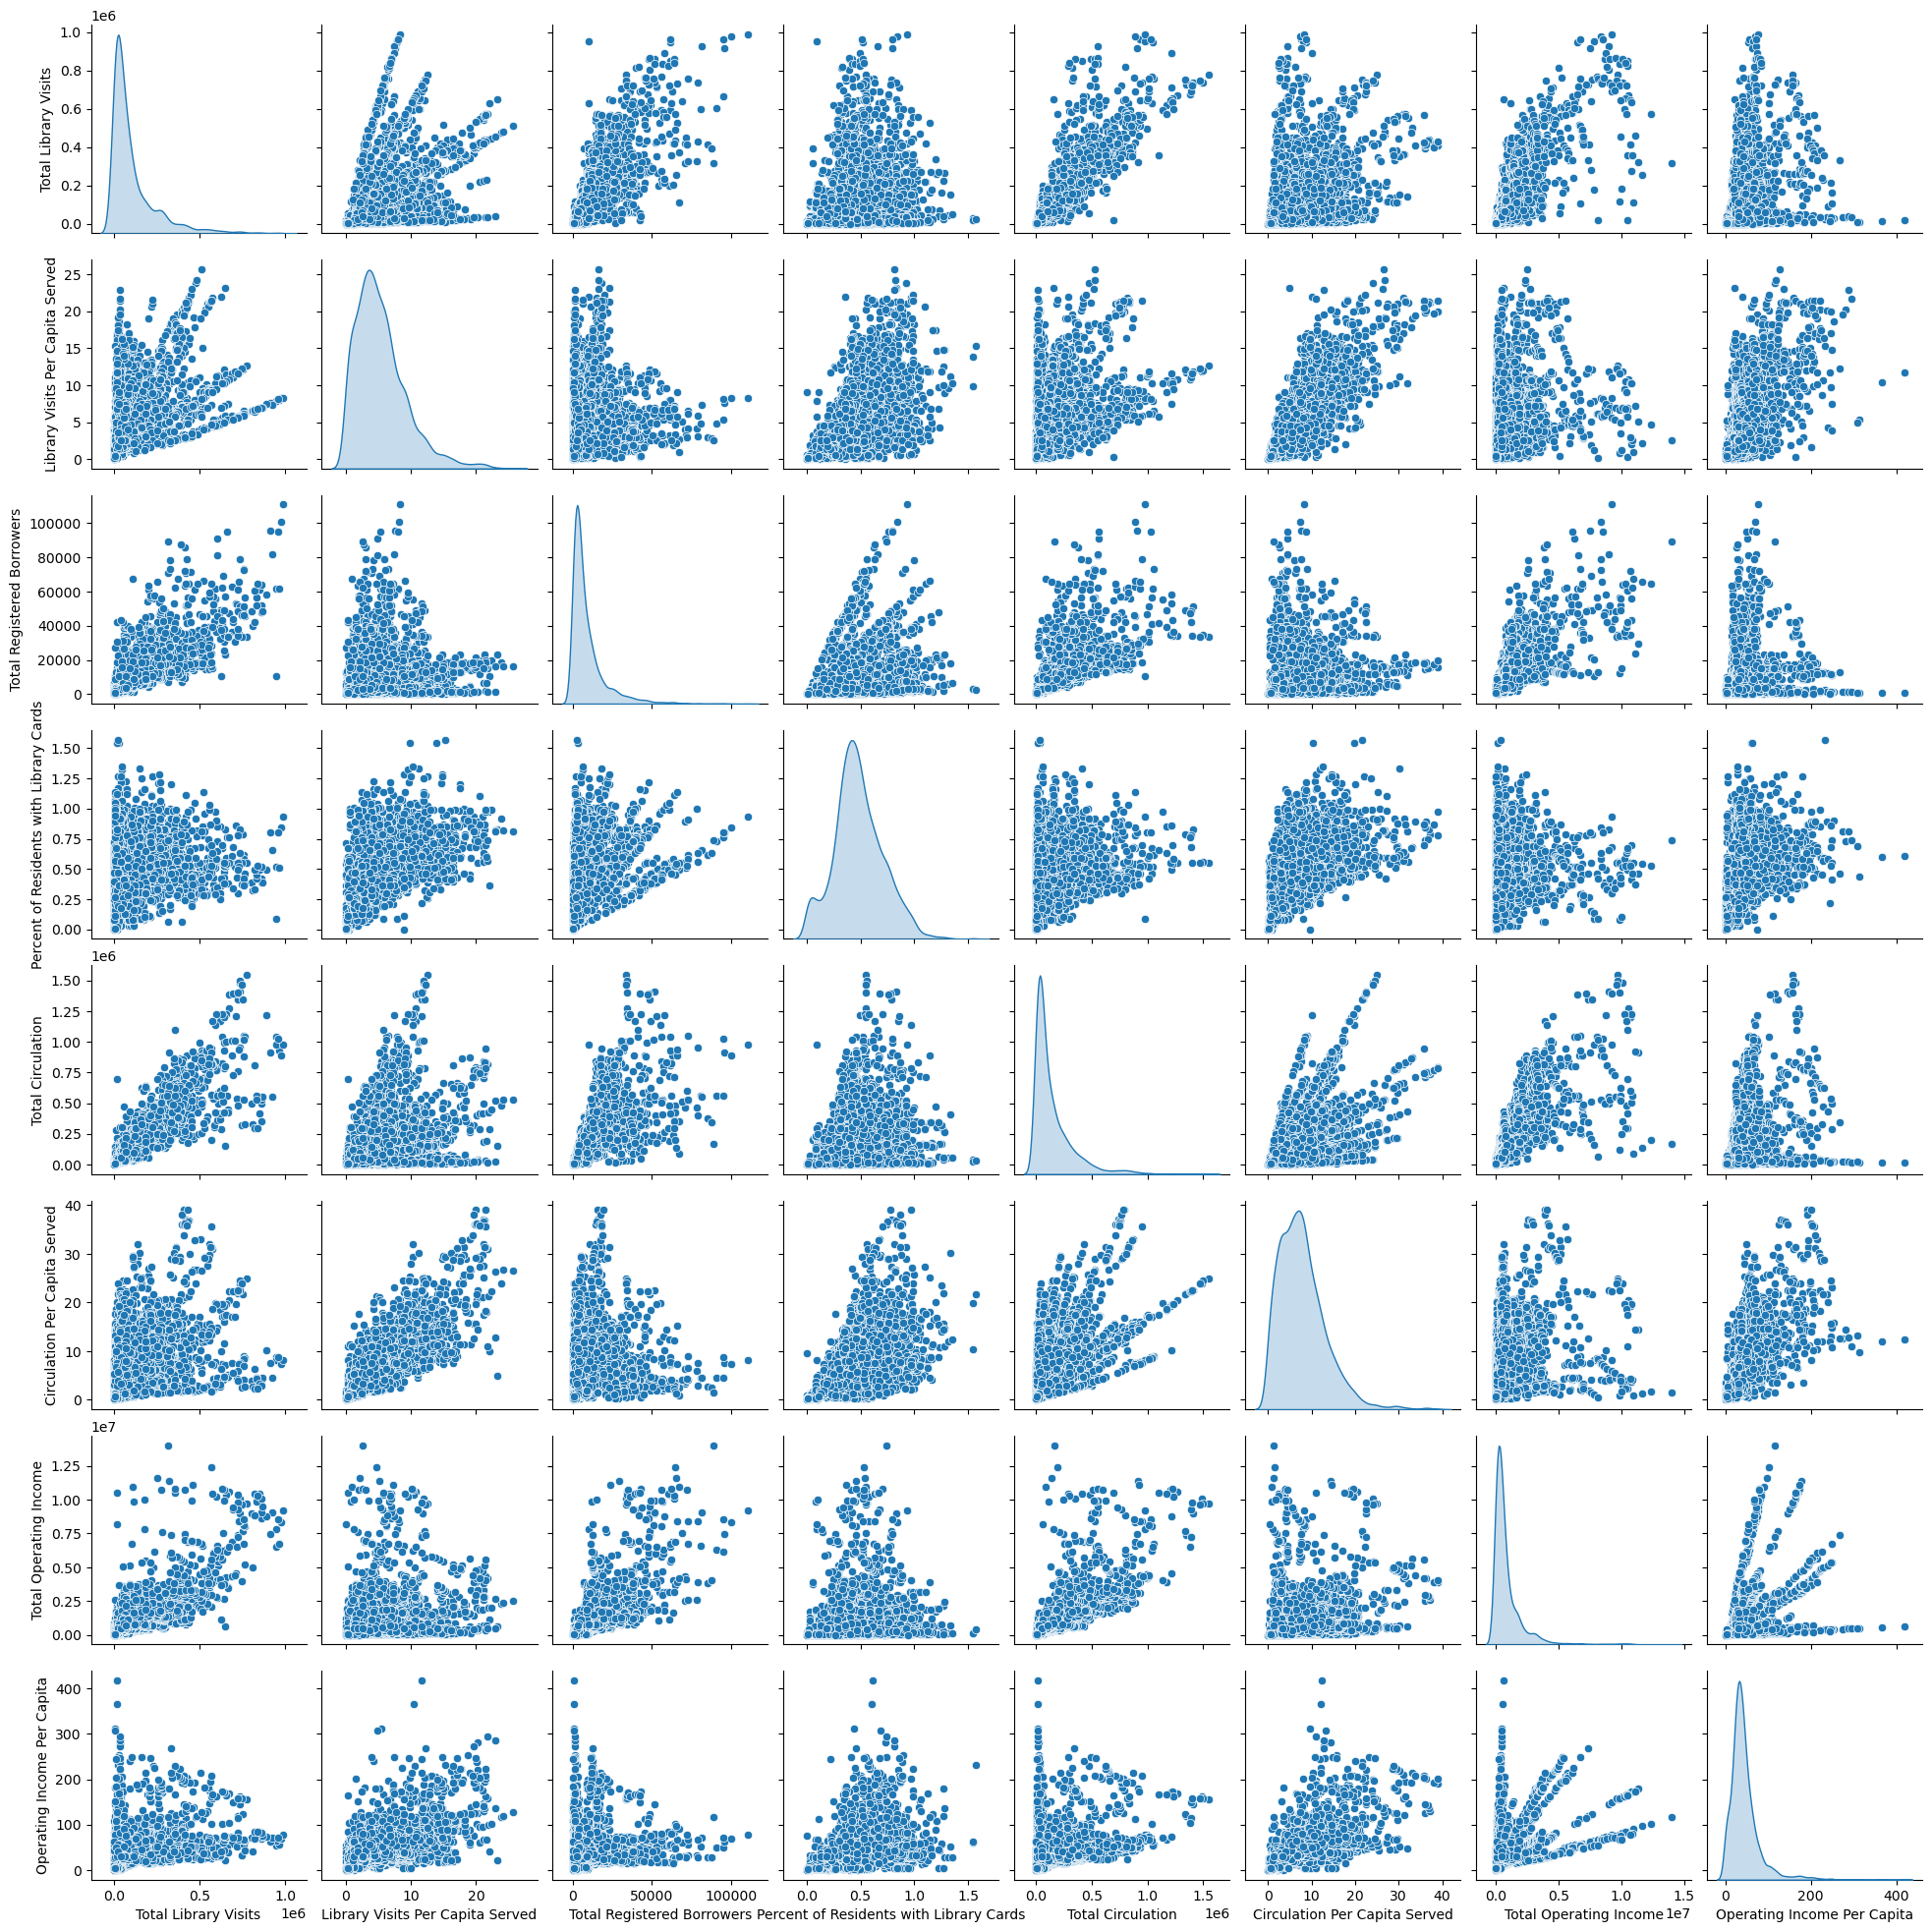

In [40]:
# 11. Coorelation Analysis
import seaborn as sns
import matplotlib.pyplot as plt
num_columns = [
    "Total Library Visits",
    "Library Visits Per Capita Served",
    "Total Registered Borrowers",
    "Percent of Residents with Library Cards",
    "Total Circulation",
    "Circulation Per Capita Served",
    "Total Operating Income",
    "Operating Income Per Capita"
]

# Creating the pairplot
sns.pairplot(df[num_columns], diag_kind="kde")
plt.savefig("pairplot_library_data.png", dpi=300)
plt.show()



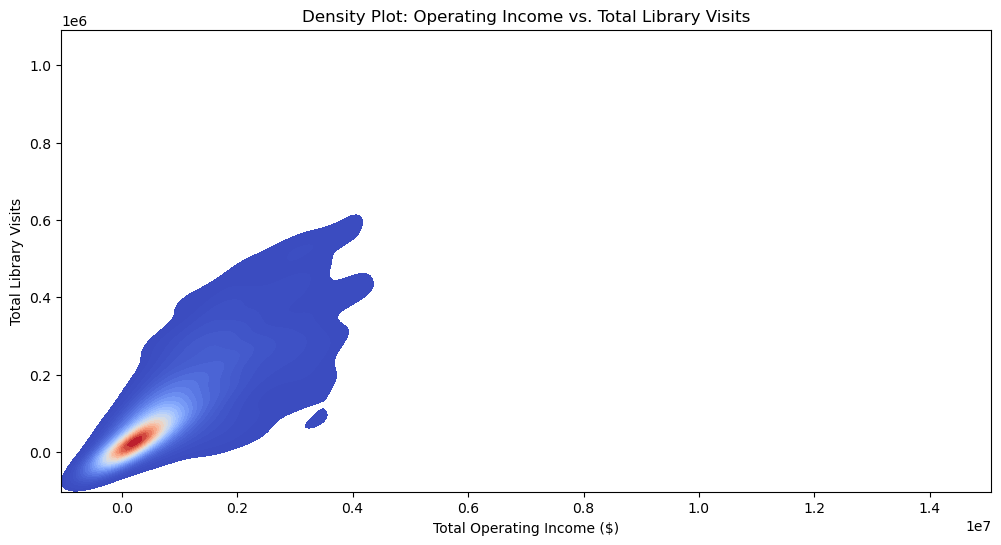

In [44]:
# 12. KDE plot for Operating Income vs. Total Library Visits
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x="Total Operating Income", y="Total Library Visits", fill=True, cmap="coolwarm", levels=30)
plt.xlabel("Total Operating Income ($)")
plt.ylabel("Total Library Visits")
plt.title("Density Plot: Operating Income vs. Total Library Visits")
plt.savefig("kde_operating_income_vs_library_visits.png", dpi=300)
plt.show()



C:\Users\megha\AppData\Local\Temp\ipykernel_33420\3991433306.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='County', y='Library Visits Per Capita Served', palette="Set2")


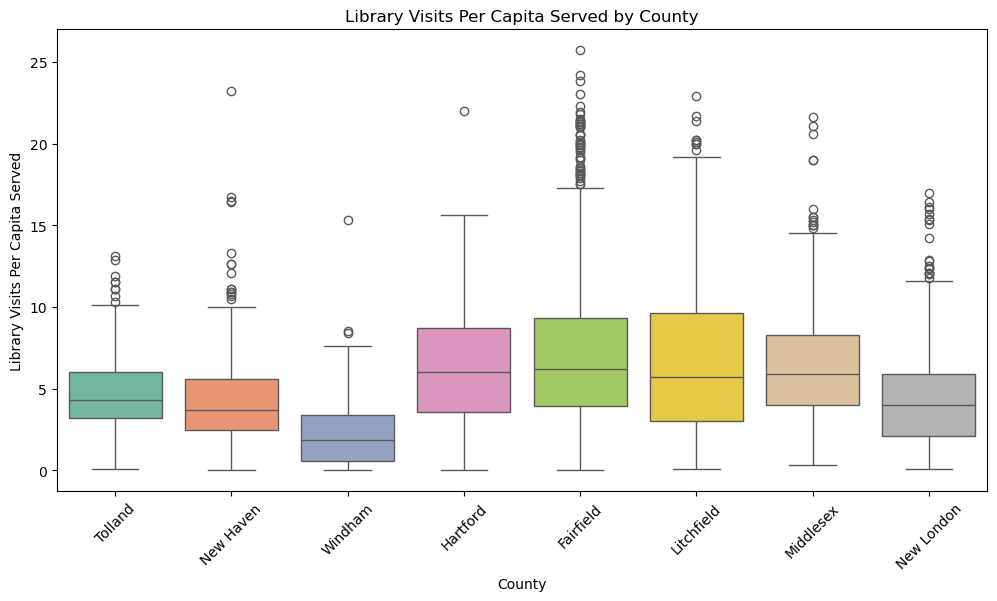

In [46]:
# 13. Boxplot: Library Visits Per Capita Served by County
# Create a boxplot for Library Visits Per Capita Served across Counties
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='County', y='Library Visits Per Capita Served', palette="Set2")
plt.xlabel("County")
plt.ylabel("Library Visits Per Capita Served")
plt.title("Library Visits Per Capita Served by County")
plt.xticks(rotation=45)
plt.savefig("boxplot_library_visits_per_capita_by_county.png", dpi=300)
plt.show()


C:\Users\megha\AppData\Local\Temp\ipykernel_33420\2230484506.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Principal Public?", y="Library Visits Per Capita Served", palette="muted")


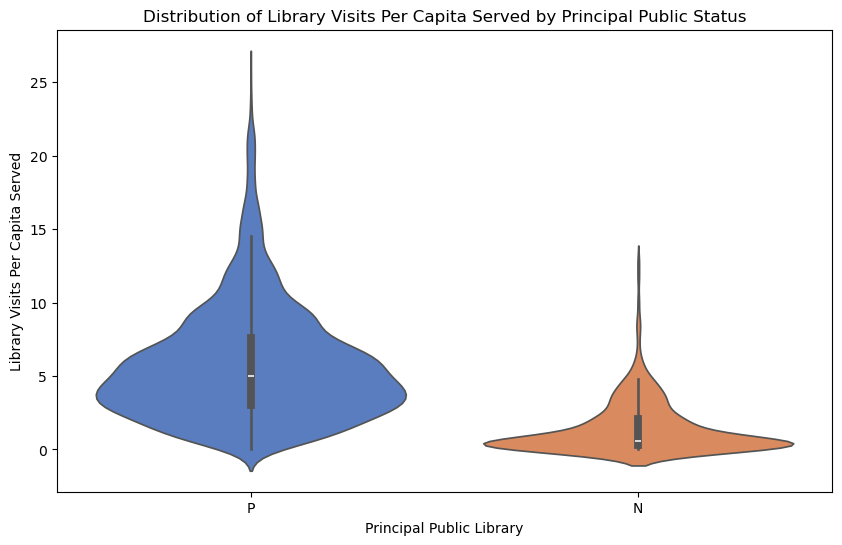

In [48]:
# 14. Violin Plot of Library Visits Per Capita by Principal Public Status
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x="Principal Public?", y="Library Visits Per Capita Served", palette="muted")
plt.xlabel("Principal Public Library")
plt.ylabel("Library Visits Per Capita Served")
plt.title("Distribution of Library Visits Per Capita Served by Principal Public Status")
plt.savefig("violinplot_library_visits_per_capita.png", dpi=300)
plt.show()


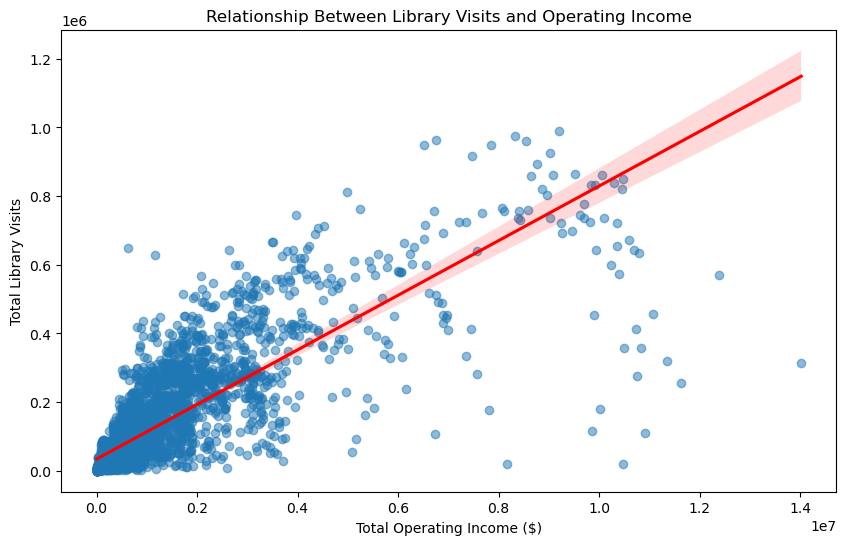

In [50]:
# Advanced Analysis
# 15. Scatter Plot with Regression Line for Library Visits vs. Operating Income
import seaborn as sns
import matplotlib.pyplot as plt

# Create scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x="Total Operating Income", y="Total Library Visits", scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("Total Operating Income ($)")
plt.ylabel("Total Library Visits")
plt.title("Relationship Between Library Visits and Operating Income")
plt.savefig("scatterplot_library_visits_vs_income.png", dpi=300)
plt.show()


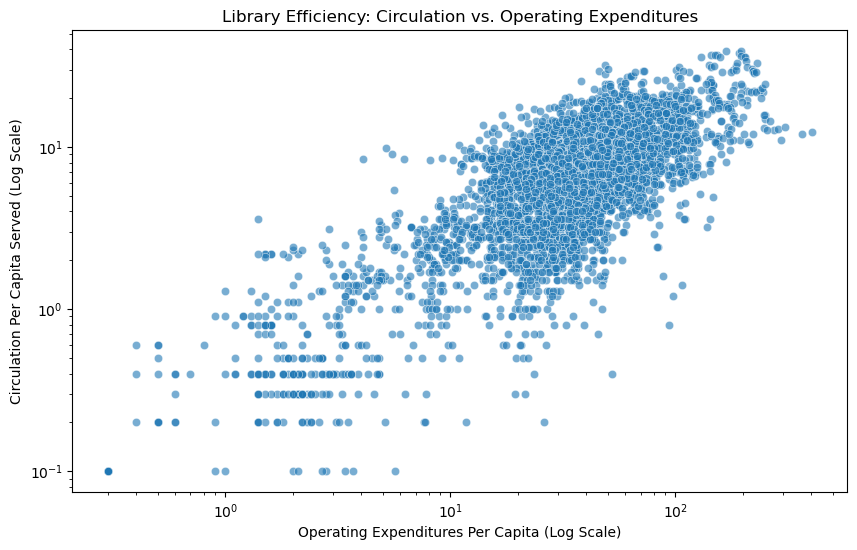

In [52]:
# 16. Distribution of Library Efficiency Using a Scatterplot with Log Scale
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 6))

# Create scatter plot with log scales
sns.scatterplot(data=df, x="Operating Expenditures Per Capita", y="Circulation Per Capita Served", alpha=0.6)

# Log scale transformation for better visualization
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Operating Expenditures Per Capita (Log Scale)")
plt.ylabel("Circulation Per Capita Served (Log Scale)")
plt.title("Library Efficiency: Circulation vs. Operating Expenditures")
plt.savefig("scatterplot_library_efficiency_logscale.png", dpi=300)
plt.show()
